# Unfälle & Zählung - Views erstellen


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

mpl.style.use('ggplot')

# 1) Datensätze einlesen

In [2]:
df_verkehrszaehlung_2020 = pd.read_csv('./data/verkehrszaehlung_2020_mit_quartier_kreis.csv', low_memory=False)
df_verkehrsunfaelle_2020 = pd.read_csv('./data/verkehrsunfaelle_2020_mit_quartier_kreis.csv')

In [3]:
df_verkehrszaehlung_2020.head()

,Unnamed: 0,MSID,MessungDatum,ZeitKategorie,MSName,ZSID,ZSName,Achse,HNr,Hoehe,EKoord,NKoord,Richtung,Knummer,Kname,AnzDetektoren,D1ID,D2ID,D3ID,D4ID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus,MessungZeit,Jahr,Monat,Tag,Wochentag,MonatText,Jahreszeit,Koord_WGS84_E,Koord_WGS84_N,Kreis,Quartier,Verkehrsaufkommen
0,0,Z001M001,2020-01-01,Nacht,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 00:00:00,2021-02-04,1020.0,Gemessen,00:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering
1,1,Z001M001,2020-01-01,Rushhour_Morgen,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 06:00:00,2021-02-04,168.0,Gemessen,06:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering
2,2,Z001M001,2020-01-01,Morgen,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 10:00:00,2021-02-04,314.0,Gemessen,10:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering
3,3,Z001M001,2020-01-01,Nachmittag,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 13:00:00,2021-02-04,586.0,Gemessen,13:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering
4,4,Z001M001,2020-01-01,Rushhour_Abend,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.89,1243936.2,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,2020-01-01 16:00:00,2021-02-04,805.0,Gemessen,16:00:00,2020,1,2,Mittwoch,Januar,Winter,47.341059,8.537068,Kreis 2,Wollishofen,Gering


In [4]:
df_verkehrsunfaelle_2020.head()

,AccidentUID,Quartier,AccidentType,AccidentType_de,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_de,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_de,AccidentWeekDay,AccidentWeekDay_de,AccidentHour,AccidentHour_text,AccidentLocation_WGS84_E,AccidentLocation_WGS84_N,Kreis,Jahreszeit,ZeitKategorie
0,9CCA869C93E0DA25E05329B9D80AF2FB,8057,at0,Schleuder- oder Selbstunfall,as3,Unfall mit Leichtverletzten,False,True,False,rt433,Nebenstrasse,2683236,1249583,ZH,261,2020,1,Januar,aw403,Mittwoch,4.0,04h-05h,47.391814,8.541109,Kreis 6,Winter,Nacht
1,9E7139B16D85C771E05329B9D80A926E,8090,at8,Fussgängerunfall,as3,Unfall mit Leichtverletzten,True,False,False,rt433,Nebenstrasse,2682964,1248220,ZH,261,2020,1,Januar,aw403,Mittwoch,5.0,05h-06h,47.379590,8.537254,Kreis 5,Winter,Nacht
2,9E7139B167FDC771E05329B9D80A926E,8021,at1,Überholunfall oder Fahrstreifenwechsel,as4,Unfall mit Sachschaden,False,True,False,rt433,Nebenstrasse,2682811,1247444,ZH,261,2020,1,Januar,aw403,Mittwoch,5.0,05h-06h,47.372631,8.535085,Kreis 1,Winter,Nacht
3,A235C3252D0E9903E05328B9D80AFCE5,8048,at0,Schleuder- oder Selbstunfall,as4,Unfall mit Sachschaden,False,False,False,rt433,Nebenstrasse,2679166,1248512,ZH,261,2020,1,Januar,aw403,Mittwoch,12.0,12h-13h,47.382684,8.487018,Kreis 9,Winter,Morgen
4,9EC134679786BAC8E05329B9D80A310C,8004,at7,Parkierunfall,as4,Unfall mit Sachschaden,False,False,False,rt433,Nebenstrasse,2682395,1248019,ZH,261,2020,1,Januar,aw403,Mittwoch,14.0,14h-15h,47.377854,8.529684,Kreis 4,Winter,Nachmittag


## 1.1) Datensätze joinen

In [5]:
df_temp = df_verkehrszaehlung_2020.groupby(by=["Kreis","Jahr","MonatText","Wochentag","ZeitKategorie"]).sum()
df_temp.head(10)

Unnamed: 0        EKoord  \
Kreis   Jahr MonatText Wochentag  ZeitKategorie                               
Kreis 1 2020 April     Dienstag   Abend              16556152  2.468612e+08   
                                  Morgen             16555876  2.468612e+08   
                                  Nachmittag         16555968  2.468612e+08   
                                  Nacht              16555692  2.468612e+08   
                                  Rushhour_Abend     16556060  2.468612e+08   
                                  Rushhour_Morgen    16555784  2.468612e+08   
                       Donnerstag Abend              20694155  3.085765e+08   
                                  Morgen             20693810  3.085765e+08   
                                  Nachmittag         20693925  3.085765e+08   
                                  Nacht              20693580  3.085765e+08   

                                                         NKoord  Knummer  \
Kreis   Jahr MonatText Wochentag  ZeitKategorie                            
Kreis 1 2020 April     Dienstag   Abend            1.147708e+08    36356   
                                  Morgen           1.147708e+08    36356   
                                  Nachmittag       1.147708e+08    36356   
                                  Nacht            1.147708e+08    36356   
                                  Rushhour_Abend   1.147708e+08    36356   
                                  Rushhour_Morgen  1.147708e+08    36356   
                       Donnerstag Abend            1.434634e+08    45445   
                                  Morgen           1.434634e+08    45445   
                                  Nachmittag       1.434634e+08    45445   
                                  Nacht            1.434634e+08    45445   

                                                   AnzDetektoren  D1ID  \
Kreis   Jahr MonatText Wochentag  ZeitKategorie                          
Kreis 1 2020 April     Dienstag   Abend                      136  1284   
                                  Morgen                     136  1284   
                                  Nachmittag                 136  1284   
                                  Nacht                      136  1284   
                                  Rushhour_Abend             136  1284   
                                  Rushhour_Morgen            136  1284   
                       Donnerstag Abend                      170  1605   
                                  Morgen                     170  1605   
                                  Nachmittag                 170  1605   
                                  Nacht                      170  1605   

                                                   AnzFahrzeuge  Monat  Tag  \
Kreis   Jahr MonatText Wochentag  ZeitKategorie                               
Kreis 1 2020 April     Dienstag   Abend                 39937.0    368   92   
                                  Morgen               104505.0    368   92   
                                  Nachmittag           108643.0    368   92   
                                  Nacht                 19079.0    368   92   
                                  Rushhour_Abend       149857.0    368   92   
                                  Rushhour_Morgen      153923.0    368   92   
                       Donnerstag Abend                 60652.0    460  345   
                                  Morgen               135186.0    460  345   
                                  Nachmittag           144076.0    460  345   
                                  Nacht                 24881.0    460  345   

                                                   Koord_WGS84_E  \
Kreis   Jahr MonatText Wochentag  ZeitKategorie                    
Kreis 1 2020 April     Dienstag   Abend              4358.329776   
                                  Morgen             4358.329776   
                                  Nachmittag         4358.329776   
           

In [6]:
df_temp = df_temp.loc[:, df_temp.columns.intersection(['AnzFahrzeuge'])]
df_temp = df_temp.reset_index()
df_temp.head()

,Kreis,Jahr,MonatText,Wochentag,ZeitKategorie,AnzFahrzeuge
0,Kreis 1,2020,April,Dienstag,Abend,39937.0
1,Kreis 1,2020,April,Dienstag,Morgen,104505.0
2,Kreis 1,2020,April,Dienstag,Nachmittag,108643.0
3,Kreis 1,2020,April,Dienstag,Nacht,19079.0
4,Kreis 1,2020,April,Dienstag,Rushhour_Abend,149857.0


In [7]:
df_temp2 = df_verkehrsunfaelle_2020.groupby(by=["Kreis","AccidentYear","AccidentMonth_de","AccidentWeekDay_de","ZeitKategorie"]).count()
df_temp2.head(10)

AccidentUID  \
Kreis   AccidentYear AccidentMonth_de AccidentWeekDay_de ZeitKategorie                  
Kreis 1 2020         April            Dienstag           Abend                      1   
                                                         Nachmittag                 1   
                                                         Rushhour_Morgen            4   
                                      Donnerstag         Abend                      1   
                                                         Morgen                     2   
                                                         Nachmittag                 2   
                                                         Rushhour_Abend             2   
                                                         Rushhour_Morgen            1   
                                      Freitag            Rushhour_Abend             1   
                                      Mittwoch           Morgen                     3   

                                                                          Quartier  \
Kreis   AccidentYear AccidentMonth_de AccidentWeekDay_de ZeitKategorie               
Kreis 1 2020         April            Dienstag           Abend                   1   
                                                         Nachmittag              1   
                                                         Rushhour_Morgen         4   
                                      Donnerstag         Abend                   1   
                                                         Morgen                  2   
                                                         Nachmittag              2   
                                                         Rushhour_Abend          2   
                                                         Rushhour_Morgen         1   
                                      Freitag            Rushhour_Abend          1   
                                      Mittwoch           Morgen                  3   

                                                                          AccidentType  \
Kreis   AccidentYear AccidentMonth_de AccidentWeekDay_de ZeitKategorie                   
Kreis 1 2020         April            Dienstag           Abend                       1   
                                                         Nachmittag                  1   
                                                         Rushhour_Morgen             4   
                                      Donnerstag         Abend                       1   
                                                         Morgen                      2   
                                                         Nachmittag                  2   
                                                         Rushhour_Abend              2   
                                                         Rushhour_Morgen             1   
                                      Freitag            Rushhour_Abend              1   
                                      Mittwoch           Morgen                      3   

                                                                          AccidentType_de  \
Kreis   AccidentYear AccidentMonth_de AccidentWeekDay_de ZeitKategorie                      
Kreis 1 2020         April            Dienstag           Abend                          1   
                                                         Nachmittag                     1   
                                                         Rushhour_Morgen                4   
                                      Donnerstag         Abend                          1   
                                                         Morgen                         2   
                                                         Nachmittag                     2   
                                                         Rushhour_Abend                 2   
                                                      

In [8]:
df_temp2 = df_temp2.loc[:, df_temp2.columns.intersection(['AccidentUID'])]
df_temp2 = df_temp2.reset_index()
df_temp2 = df_temp2.rename(columns={"AccidentYear": "Jahr", "AccidentMonth_de": "MonatText","AccidentWeekDay_de": "Wochentag"})
df_temp2.head()

,Kreis,Jahr,MonatText,Wochentag,ZeitKategorie,AccidentUID
0,Kreis 1,2020,April,Dienstag,Abend,1
1,Kreis 1,2020,April,Dienstag,Nachmittag,1
2,Kreis 1,2020,April,Dienstag,Rushhour_Morgen,4
3,Kreis 1,2020,April,Donnerstag,Abend,1
4,Kreis 1,2020,April,Donnerstag,Morgen,2


In [9]:
# Right-Join - Damit alle Verkehrszählungen vorhanden sind
df3 = pd.merge(df_temp2,df_temp,how='right', on=['Kreis','Jahr','MonatText','Wochentag','ZeitKategorie'])
df3.head()

,Kreis,Jahr,MonatText,Wochentag,ZeitKategorie,AccidentUID,AnzFahrzeuge
0,Kreis 1,2020,April,Dienstag,Abend,1.0,39937.0
1,Kreis 1,2020,April,Dienstag,Nachmittag,1.0,108643.0
2,Kreis 1,2020,April,Dienstag,Rushhour_Morgen,4.0,153923.0
3,Kreis 1,2020,April,Donnerstag,Abend,1.0,60652.0
4,Kreis 1,2020,April,Donnerstag,Morgen,2.0,135186.0


# 2) Plots für Kreis 11

## 2.1) Barplot - Anzahl Unfälle pro Zeitkategorie

In [10]:
df4 = df3.groupby(by=["Kreis","ZeitKategorie"]).sum()
df4.head()

Jahr  AccidentUID  AnzFahrzeuge
Kreis   ZeitKategorie                                    
Kreis 1 Abend           169680         86.0     8102497.0
        Morgen          169680        131.0    11623087.0
        Nachmittag      169680        154.0    12710633.0
        Nacht           169680         36.0     3912003.0
        Rushhour_Abend  169680        179.0    16553173.0

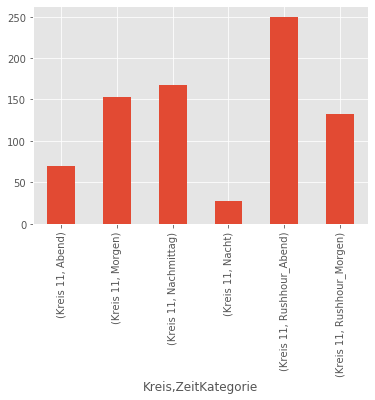

In [11]:
df4.iloc[df4.index.get_level_values('Kreis') == 'Kreis 11']['AccidentUID'].plot(kind="bar")
plt.show()

## 2.2) Barplot - Anzahl Unfälle verglichen mit der Verkehrszählung

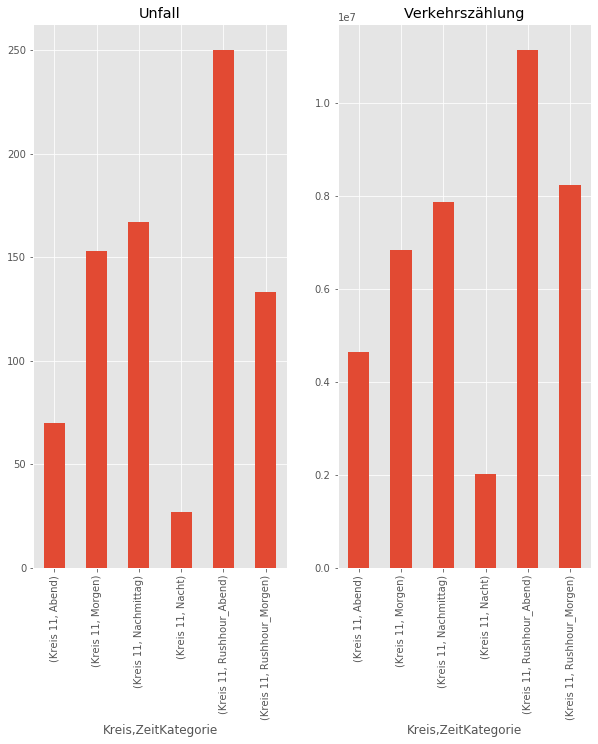

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
df4.iloc[df4.index.get_level_values('Kreis') == 'Kreis 11']['AccidentUID'].plot(ax=axes[0], kind='bar')
axes[0].set_title('Unfall')
df4.iloc[df4.index.get_level_values('Kreis') == 'Kreis 11']['AnzFahrzeuge'].plot(ax=axes[1], kind='bar')
axes[1].set_title('Verkehrszählung')
plt.show()